# Polynomial Linear Regression: Application

In this notebook, we examine how to apply polynomial linear regression in Python on a sample dataset containing a single independent variable, in order to determine a job candidate's salary.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>
2. <a>Find a page that discusses overfitting and come back here</a>

In [1]:
# Import machine learning support
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Import analytical support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import other support
import os

## Load & Preview Data

In [2]:
# Define salary data file path
salaries_file_path = os.path.join('Data', 'Position_Salaries.csv')

# Load salary data
salaries = pd.read_csv(salaries_file_path)

In [3]:
# Preview data
print(salaries.shape)
display(salaries.head())
display(salaries.describe().transpose())

(10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


Before we define our features and labels, we make note of the columns we have to work with.  Ultimately, we are using a person's position to determine their salary, and we have two columns related to this — Position and Level.  By observation, we can tell that these two columns essentially have the same data in different formats, and are therefore redundant.  Therefore, we only need to proceed with one.  For simplicity's sake, we will use the Level column, since this is already a numerical column; otherwise we would have to encode the Position column into ordinal numbers, and end up with what the Level column already is.

## Prepare Data

In [4]:
# Define features and labels
X = salaries.iloc[:,1].values.reshape(-1,1)
y = salaries.iloc[:,2].values

Because there is so little data to work with, we will not split it into training and testing sets.  We will instead use all the data to train the model, then examine how well the model fits the data.

For comparison's sake, we will train both a simple linear regression and a polynomial regression model, and observe how each one fits the data.

## Prepare Regressor

In [5]:
# Initialize simple regression object
regressor_simple = LinearRegression()

# Fit simple linear regressor to data
regressor_simple.fit(X, y)

LinearRegression()

Before we examine our simple linear regression model, we will build the polynomial linear regression model.  To understand how to implement polynomial linear regression in Python, let's think back to the definition of a polynomial linear regression model:


$$
y = b_0 + b_1x + b_2x^2 + ... b_nx^n
$$

Essentially, we are using a single independent variable — just like in simple linear regression.  With polynomial linear regression however, we raise this variable to the power of 1, then 2, and so on up to a pre-defined power $n$.  Therefore, our input will not be a single vector, but a matrix of variables raised to incrementing powers.  The first column in our matrix will be composed of $x^1$, or rather simply $x$.  The next column will be composed of $x^2$, and so on until the $n^{th}$ column, composed of $x^n$.

In our case, our featues are a "position level" — 1, 2, 3, ..., 10.  Defining $n$ = 2, our polynomial matrix therefore will be as follows:

\begin{equation}
\begin{bmatrix}
1 & 1^1 \\
2 & 2^2 \\
3 & 3^2 \\
4 & 4^2 \\
5 & 5^2 \\
6 & 6^2 \\
7 & 7^2 \\
8 & 8^2 \\
9 & 9^2 \\
10 & 10^2
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 \\
2 & 4 \\
3 & 9 \\
4 & 16 \\
5 &  25 \\
6 & 36 \\
7 & 49 \\
8 & 64 \\
9 & 81 \\
10 & 100 \\
\end{bmatrix}
\end{equation}

Using $n=3$, our matrix would look as follows:

\begin{equation}
\begin{bmatrix}
1 & 1^1 & 1^3 \\
2 & 2^2 & 2^3 \\
3 & 3^2 & 3^3 \\
4 & 4^2 & 4^3 \\
5 & 5^2 & 5^3 \\
6 & 6^2 & 6^3 \\
7 & 7^2 & 7^3 \\
8 & 8^2 & 8^3 \\
9 & 9^2 & 9^3 \\
10 & 10^2 & 10^3 \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 \\
2 & 4 & 8 \\
3 & 9 & 27 \\
4 & 16 & 64 \\
5 &  25 & 125 \\
6 & 36 & 216 \\
7 & 49 & 343 \\
8 & 64 & 512 \\
9 & 81 & 729 \\
10 & 100 & 1000
\end{bmatrix}
\end{equation}

The preprocessing module of scikit-learn includes the PolynomialFeatures class, which produces such a polynomial matrix.

In [6]:
# Initialize polynomial features generator of degree 2
polynomial_generator = PolynomialFeatures(degree=2)

# Fit generator matrix to features
polynomial_generator.fit(X)

# Define polynomial featues matrix
X_polynomial = polynomial_generator.transform(X)

We now compare our original features $X$, to our newly created polynomial features matrix.

In [7]:
display(X, X_polynomial)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Notice the column of ones in the polynomial matrix, and recall the equation of a polynomial linear regression model:

$$
y = b_0 + b_1x + b_2x^2 + ... b_nx^n
$$

We include this column of ones, because something has to line up with the $y$-intercept $b_0$.  We essentially have $b_0 \times 1 = b_0$.

Now, we proceed to build our polynomial linear regression model.

In [8]:
# Initialize polynomial regression object
regressor_polynomial = LinearRegression()

# Fit polynomial linear regressor to data
regressor_polynomial.fit(X_polynomial, y)

LinearRegression()

## Visualize Results

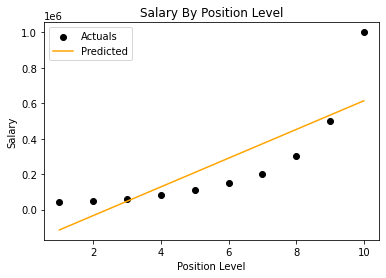

Figure 1.


In [9]:
# Define predicted salaries using simple regression
predicted_salaries_simple = regressor_simple.predict(X)

# Plot actual salaries
plt.scatter(X, y, color='black', label='Actuals')

# Plot predicted salaries using simple regression
plt.plot(X, predicted_salaries_simple, color='orange', label='Predicted')

# Define Salary
plt.title('Salary By Position Level')

# Define axis labels
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Show legend
plt.legend()

# Show graph
plt.show()
print('Figure 1.')

As can be seen in Figure 1, our actual data is not linear, and so graphically a straight line is a poor fit to it.  We see rather that our data forms a curve, and this is where polynomial regression shines, which we implment next.

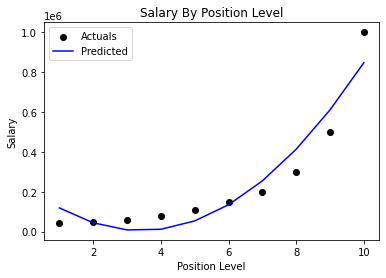

Figure 2.


In [10]:
# Define predicted salaries using polynomial regression
predicted_salaries_polynomial = regressor_polynomial.predict(X_polynomial)

# Plot actual salaries
plt.scatter(X, y, color='black', label='Actuals')

# Plot predicted salaries using polynomial regression
plt.plot(X, predicted_salaries_polynomial, color='blue', label='Predicted')

# Define Salary
plt.title('Salary By Position Level')

# Define axis labels
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Show legend
plt.legend()

# Show graph
plt.show()
print('Figure 2.')

As seen in Figure 2, higher degree polynomial regression fits this curved data better than a first degree model; although it could still be better.  In simple terms, the higher the degree of the polynomial, the more capable the model is of fitting the data.  Recall that we used a second degree polynomial: $y = b_0 + b_1x + b_2x^2$.  Next, we will compare this to third and fourth degree polynomials.

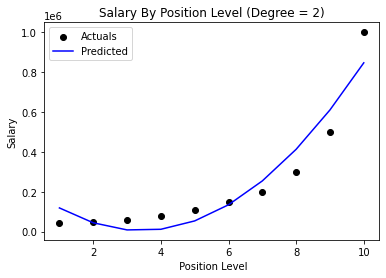

Figure 3.


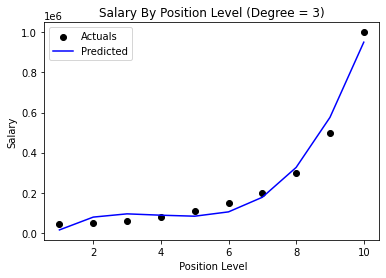

Figure 4.


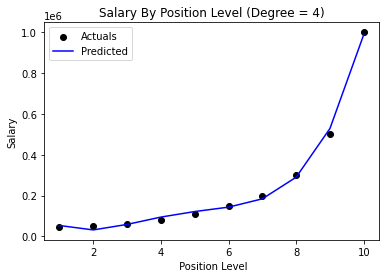

Figure 5.


In [11]:
# Define starting degree of polynomial
n = 2

# Define figure-numbering variable
figure_number = 3

# Reperform analysis & visualization until degree 4
while n < 5:
    # Initialize polynomial features generator of incrementing degrees
    polynomial_generator = PolynomialFeatures(degree=n)
    
    # Fit polynomial generator to features
    polynomial_generator.fit(X)
    
    # Define polynomial featues matrix
    X_polynomial = polynomial_generator.transform(X)

    # Fit polynomial regressor to data
    regressor_polynomial.fit(X_polynomial, y)
    
    # Define predicted salaries using polynomial regression
    predicted_salaries_polynomial = regressor_polynomial.predict(X_polynomial)
    
    # Plot actual salaries
    plt.scatter(X, y, color='black', label='Actuals')
    # Plot predicted salaries using simple regression
    plt.plot(X, predicted_salaries_polynomial, color='blue', label='Predicted')
    
    # Define Title
    plt.title(f'Salary By Position Level (Degree = {n})')

    # Define axis labels
    plt.xlabel(' Position Level')
    plt.ylabel('Salary')
    
    # Show legend
    plt.legend()

    # Show graph
    plt.show()

    print(f'Figure {figure_number}.')
    
    n += 1
    figure_number += 1

Examining Figures 3-5, we see that our curve fits the data better and better the higher the degree of the polynomial.  We should caution however about over-fitting models.$^3$  Essentially, we may potentially train a model that memorizes exact values, rather than learning a good-fitting curve.  We ignore this for now, in order to demonstrate the effect of incrementing degrees.

Finally, we close by examining a simple linear regression model and a polynomial regression model on the same graph, for comparison.

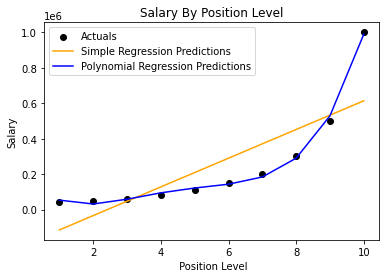

Figure 6.


In [12]:
# Plot actual salaries
plt.scatter(X, y, color='black', label='Actuals')

# Plot predicted salaries using simple regression
plt.plot(X, predicted_salaries_simple, color='orange', label='Simple Regression Predictions')
# Plot predicted salaries using simple regression
plt.plot(X, predicted_salaries_polynomial, color='blue', label= 'Polynomial Regression Predictions')

# Define Salary
plt.title('Salary By Position Level')

# Define axis labels
plt.xlabel(' Position Level')
plt.ylabel('Salary')

plt.legend()

# Show graph
plt.show()

print('Figure 6.')

In the polynomial regression models we have graphed, the curve is somewhat "choppy," drawing a line between each of 10 points.  Though not necessary, we could plot a smoother curve for the sake of visualization, by changing the step size between observations from 1 to 0.1

In [13]:
# Define array of X values with lower step size
X_grid = np.arange(start=min(X), stop=max(X), step=0.1).reshape(-1,1)

# Fit polynomial generator to features
polynomial_generator.fit(X_grid)

# Define polynomial featues matrix
X_grid_polynomial = polynomial_generator.transform(X_grid)

# Define predicted salaries using polynomial regression
predicted_salaries_polynomial = regressor_polynomial.predict(X_grid_polynomial)

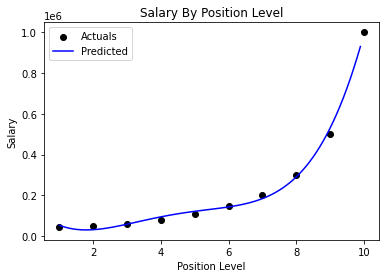

Figure 7.


In [14]:
# Plot actual salaries
plt.scatter(X, y, color='black', label='Actuals')

# Plot predicted salaries using simple regression
plt.plot(X_grid, predicted_salaries_polynomial, color='blue', label='Predicted')

# Define Salary
plt.title('Salary By Position Level')

# Define axis labels
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Show legend
plt.legend()

# Show graph
plt.show()
print('Figure 7.')

## Predicting New Results

We have already seen how to use simple linear regression models to predict outputs.

In [15]:
# Define position level
position_level = [[4]]

# Predict salary using simple regression
print(regressor_simple.predict(position_level))

print('\nFigure 8.')

[128181.81818182]

Figure 8.


In Figure 8, our simple regression model tells us that an individual at position level 4 (Manager) should have a salary of $128,000.  Let's now examine the actual salary:

In [16]:
salaries.iloc[3]

Position    Manager
Level             4
Salary        80000
Name: 3, dtype: object

Per the actual data, a Manager (position level 4) should only be making $80,000.  Using simple linear regression, we would pay this individual far more than necessary.

Let us now examine how to use polynomial regression models to make the same prediction.  Recall that when training the model, we used a PolynomialFeatures object to create a polynomial matrix for input; we therefore do the same for inputs to the predict() method.

In [17]:
# Fit polynomial generator to input value
polynomial_generator.fit(position_level)

# Define polynomial features matrix
position_level_polynomial_matrix = polynomial_generator.transform(position_level)

# Predict salary using polynomial regression
print(regressor_polynomial.predict(position_level_polynomial_matrix))

print('\nFigure 9.')

[94632.86713289]

Figure 9.


Per Figrure 9, a polynomial regression model predicted a salary of $94,000 for a Manager, a much closer prediction than simple regression.  By using a higher degree polynomial, we may able to get even closer to the actual value, albeit with the risk of overfitting the model.

Predicting multiple salaries is as simple as using an array with multiple elements as the starting input.

In [18]:
# Define position levels
position_levels = [[4], [5]]

# Fit polynomial matrix to input value
polynomial_generator.fit(position_levels)

# Define polynomial features matrix
position_level_polynomial_matrix = polynomial_generator.transform(position_levels)

# Predict salary using polynomial regression
print(regressor_polynomial.predict(position_level_polynomial_matrix))

print('\nFigure 8.')

[ 94632.86713289 121724.94172498]

Figure 8.


In [19]:
# Print actual datapoints
print(salaries.iloc[3])
print('\n', salaries.iloc[4])

Position    Manager
Level             4
Salary        80000
Name: 3, dtype: object

 Position    Country Manager
Level                     5
Salary               110000
Name: 4, dtype: object


## Closing Notes

Recall that our polynomial regression object is just an instance of the LinearRegression() class, meaning it has the same methods and attributes.  Similar to simple and multiple linear regression, we can return the $y$-intercept and coefficients using the same attributes.

In [20]:
# Print y-intercept
print(regressor_polynomial.intercept_)

# Print coefficients
print('\n', regressor_polynomial.coef_)

184166.6666670672

 [      0.         -211002.33100266   94765.44289054  -15463.2867133
     890.15151515]
